# Phishing URL Detection

In [1]:
# importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df= pd.read_csv(r"C:\Users\Ganesh\mini pro\phishing_site_urls.csv")

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549357 entries, 0 to 549356
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549357 non-null  object
 1   Label   549357 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
df.shape

(549357, 2)

In [6]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

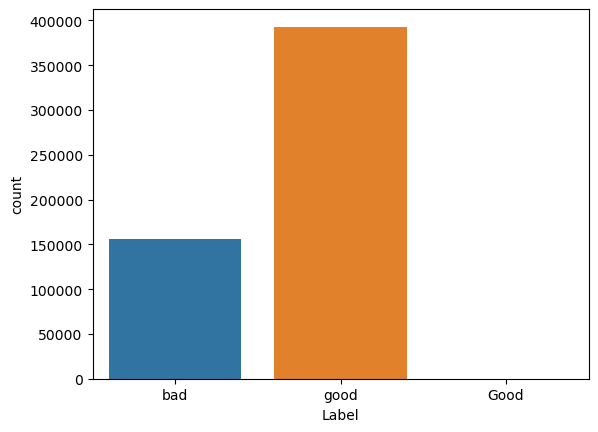

In [7]:
sns.countplot(x="Label",data=df)

### PREPROCESSING

#### Now we can Vectoize the URLs.We can gather words from the URLs using Tokenizer
### RegexpTokenizer
#### we are able to extract the tokens from string by using regular expression with RegexpTokenizer() method.

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
tokenizer.tokenize(df.URL[0]) # this will fetch all the words from the first URL

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [10]:
# Tokenizing all the rows 
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [11]:
df.sample(5)

,URL,Label,text_tokenized
325240,experiencefestival.com/a/William_Grey_Walter/i...,good,"[experiencefestival, com, a, William, Grey, Wa..."
42777,information-box.com/wp-content/nordea.dk/websc...,bad,"[information, box, com, wp, content, nordea, d..."
119782,alejandraandelliot.com/wp-content/themes/twent...,bad,"[alejandraandelliot, com, wp, content, themes,..."
482087,yourbittorrent.com/?q=musique-kabyle,good,"[yourbittorrent, com, q, musique, kabyle]"
364913,jdjournal.com/2009/03/16/mcmillan-absorbs-thac...,good,"[jdjournal, com, mcmillan, absorbs, thackray, ..."


### SnowballStemmer
#### Snowball is a small string processing language that gives the root words

In [12]:
stemmer = SnowballStemmer("english") # choose a language

In [13]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [14]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
115915,hqprocess.com/wp-includes/certificates/id858-3...,bad,"[hqprocess, com, wp, includes, certificates, i...","[hqprocess, com, wp, includ, certif, id, p]"
33860,service.confirm.paypal.cmd.cgi-bin.2466sd4f3e6...,bad,"[service, confirm, paypal, cmd, cgi, bin, sd, ...","[servic, confirm, paypal, cmd, cgi, bin, sd, f..."
316944,dramafans.org/drama/dance_drill,good,"[dramafans, org, drama, dance, drill]","[dramafan, org, drama, danc, drill]"
293882,bondwolfe.net/bars.asp,good,"[bondwolfe, net, bars, asp]","[bondwolf, net, bar, asp]"
359565,imdb.com/name/nm1553725/,good,"[imdb, com, name, nm]","[imdb, com, name, nm]"


In [15]:
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [16]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [17]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [18]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [19]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


## Creating Model
### CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [20]:
cv = CountVectorizer()

In [21]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [22]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
#feature.todense()

In [24]:
#feature = encoder.fit_transform(feature)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

### LogisticRegression
#### Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

LogisticRegression()

In [29]:
lr.score(testX,testY)

0.9670744138634046

#### Logistic Regression provide 96% accuracy,Now we will store the score in the dictionary so that we can find which model performs the best.


In [30]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

In [32]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
#con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
#            columns = ['Predicted:Bad', 'Predicted:Good'],
#            index = ['Actual:Bad', 'Actual:Good'])
#
#
#print('\nCLASSIFICATION REPORT\n')
#print(classification_report(lr.predict(testX), testY,
#                            target_names =['Bad','Good']))

#print('\nCONFUSION MATRIX')
#plt.figure(figsize= (6,4))
#sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Training Accuracy : 0.9820298676996337
Testing Accuracy : 0.9670744138634046


## MultinomialNB
#### The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [33]:
from sklearn.naive_bayes import MultinomialNB 


In [34]:
# create mnb object
mnb = MultinomialNB()

In [35]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [36]:
mnb.score(testX,testY)

0.9581913499344692

#### MultinomialNB provide 95% accuracy,so we can store the score in the dictionary

In [37]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

In [39]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
#con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
#            columns = ['Predicted:Bad', 'Predicted:Good'],
#            index = ['Actual:Bad', 'Actual:Good'])


#print('\nCLASSIFICATION REPORT\n')
#print(classification_report(mnb.predict(testX), testY,
#                            target_names =['Bad','Good']))

#print('\nCONFUSION MATRIX')
#plt.figure(figsize= (6,4))
#sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Training Accuracy : 0.9740520415419752
Testing Accuracy : 0.9581913499344692


<AxesSubplot:ylabel='Accuracy'>

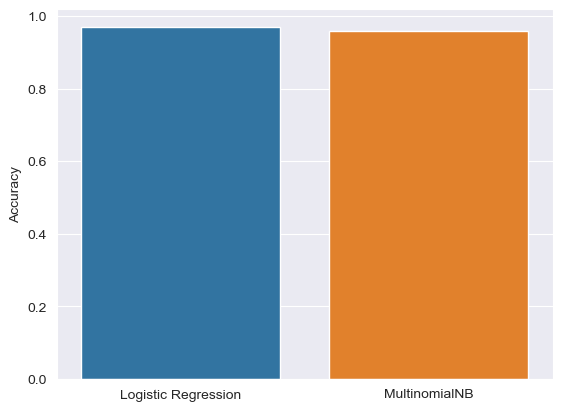

In [40]:
# Lets compare the two models and find out which one is best.
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

#### So, Logistic Regression is the best fit model, Now lets make sklearn pipeline using Logistic Regression

In [41]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [42]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [43]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [44]:
pipeline_ls.score(testX,testY)

0.9702708606378331

In [45]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
#con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
#            columns = ['Predicted:Bad', 'Predicted:Good'],
#            index = ['Actual:Bad', 'Actual:Good'])


#print('\nCLASSIFICATION REPORT\n')
#print(classification_report(pipeline_ls.predict(testX), testY,
#                            target_names =['Bad','Good']))

#print('\nCONFUSION MATRIX')
#plt.figure(figsize= (6,4))
#sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Training Accuracy : 0.9868306404832811
Testing Accuracy : 0.9702708606378331


In [46]:
#trainX.toarray()

In [47]:

#trainX = encoder.fit_transform(trainX)

In [48]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vec = TfidfVectorizer()
#trainX = vec.fit_transform(trainX)

In [49]:
#testX = vec.fit_transform(testX)

In [50]:
#from sklearn.ensemble import GradientBoostingClassifier
#gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
#gbc.fit(trainX,trainY)

In [51]:
#predicting the target value from the model for the samples
#y_train_gbc = gbc.predict(trainX)
#y_test_gbc = gbc.predict(testX)

# Import the model in pickle.

In [52]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [53]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9702708606378331


In [54]:
vinay = input("enter url: ")
output = pipeline_ls.predict([vinay])
print(output)

enter url: https://www.samsung.com/in/
['bad']
